# Analise de Dados Titanic
Analise dos dados demográficos de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic

In [3]:
#importando bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
%matplotlib inline

#lendo os dados para análise
df_titanic = pd.read_csv("titanic-data-6.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Primeiro Passo
Perguntas a serem realizadas

Quais foram os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver?

Quais foram os fatores para que as pessoas comprassem primeira classe?

O fato de ter parentes a bordo fez com que pessoas não abondonassem o navio?

#  Segundo Passo
Limpar os dados

Consiste em tres passos: Reunir, avaliar e limpar. Reune os dados que vai precisar para responder as perguntas da  análise dos dados, avalia para identificar qualquer dificuldade que possa obter durante a análise e limpa os dados modificando, substituindo ou removendo para se obter a melhor qualidade para as respostas.

In [18]:
#Verificando o tamanho da amostra
print("Quantidade de amostras {}".format(df_titanic.shape[0]))
print("Quantidade de colunas {}".format(df_titanic.shape[1]))

Quantidade de amostras 891
Quantidade de colunas 12


In [19]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Como o dataframe ja possui uma coluna de Id, vamos utilizar a propria coluna do dataframe de index, para isso vamos ler novamente o dataframe indicando a coluna PassengerId como index.

In [ ]:
df_titanic = pd.read_csv("titanic-data-6.csv", index_col="PassengerId")
df_titanic.head()

Verificando as colunas do dataframe podemos observar que estão todas começando com letras maiusculas e algumas em seguida que possuem mais de um nome estão com outras letras maiusculas na mesma palavra, então será colocado todos os valores das colunas para letras minusculas para que seja mais facil o acesso aos dados

In [20]:
#Colunas do dataframe
for i, v in enumerate(df_titanic.columns):
    print(i, v)

0 PassengerId
1 Survived
2 Pclass
3 Name
4 Sex
5 Age
6 SibSp
7 Parch
8 Ticket
9 Fare
10 Cabin
11 Embarked


In [32]:
#colocando todas as colunas com letras minusculas para facilidade de acesso 
df_titanic.rename(columns=lambda x: x.strip().lower(), inplace=True)
df_titanic.to_csv('titanic-data-6.csv', index=False)
df_titanic.head(1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Algumas informações não são necessárias para responder as perguntas feitas para a análise dos dados, então para isso será removida as colunas desnecessárias.

In [37]:
drop_list = ['ticket', 'cabin']
df_titanic.drop(drop_list, axis=1, inplace=True)

In [38]:
df_titanic.head(1)

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
passengerid,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S


Tratando dados duplicados e nulos

In [39]:
print("Quantidade de dados duplicados: {}".format(df_titanic.duplicated().sum()))

Quantidade de dados duplicados: 0


In [40]:
df_titanic.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

Existem muitos dados de idade sem registro, se removessemos esses dados estariamos comprometendo a análise dos dados. Então para esse problema serão substituidos os dados nulos pela média da idade do dataframe.

In [41]:
#Alterando dados nulos para valores da média
df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)

Como temos somente dois dados nulos de onde o passageiro embarcou, vamos eliminar esses dados pois não serão relevantes para a análise.

In [43]:
#Removendo valores nulos
df_titanic.dropna(inplace=True, how='any')

In [88]:
bin_edges = [ 0, 18, 60, 100]
bin_names = [ 'Crianca', 'Adulto' , 'Idoso']
df_titanic['age_levels'] = pd.cut(df_titanic['age'], bin_edges, labels=bin_names)

In [44]:
#Verificando as alterações
df_titanic.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

Fazendo análise dos tipos dos dados

In [66]:
for column in df_titanic.columns:
        print("coluna: {0}, tipo: {1}".format(column, type(df_titanic[column][1])))

coluna: survived, tipo: <class 'numpy.int64'>
coluna: pclass, tipo: <class 'numpy.int64'>
coluna: name, tipo: <class 'str'>
coluna: sex, tipo: <class 'str'>
coluna: age, tipo: <class 'numpy.float64'>
coluna: sibsp, tipo: <class 'numpy.int64'>
coluna: parch, tipo: <class 'numpy.int64'>
coluna: fare, tipo: <class 'numpy.float64'>
coluna: embarked, tipo: <class 'str'>


Visualizando os tipos dos dados, é possível verificar que as idades estão como tipo float, para melhorar os calculos vamos passar as idades para o tipo int64

In [67]:
df_titanic['age'] = df_titanic['age'].astype(int)

In [68]:
#Verificando a modificação
print("coluna: age, tipo: {}".format(type(df_titanic['age'][1])))

coluna: age, tipo: <class 'numpy.int64'>


In [70]:
df_titanic.head(10)

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
passengerid,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S
6,0,3,"Moran, Mr. James",male,29,0,0,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,11.1333,S


# Terceiro Passo
Análise exploratória dos dados.

Envolve encontrar padrões e relações entre os dados e entender sobre o assunto que esta sendo abordado.

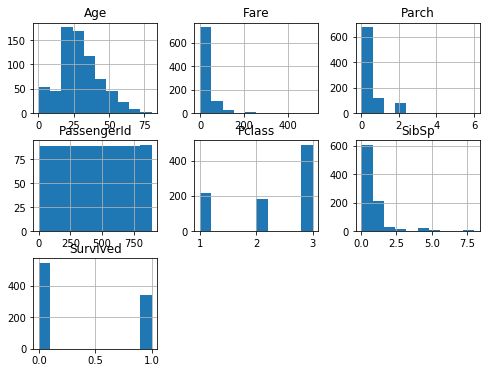

In [16]:
df_titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

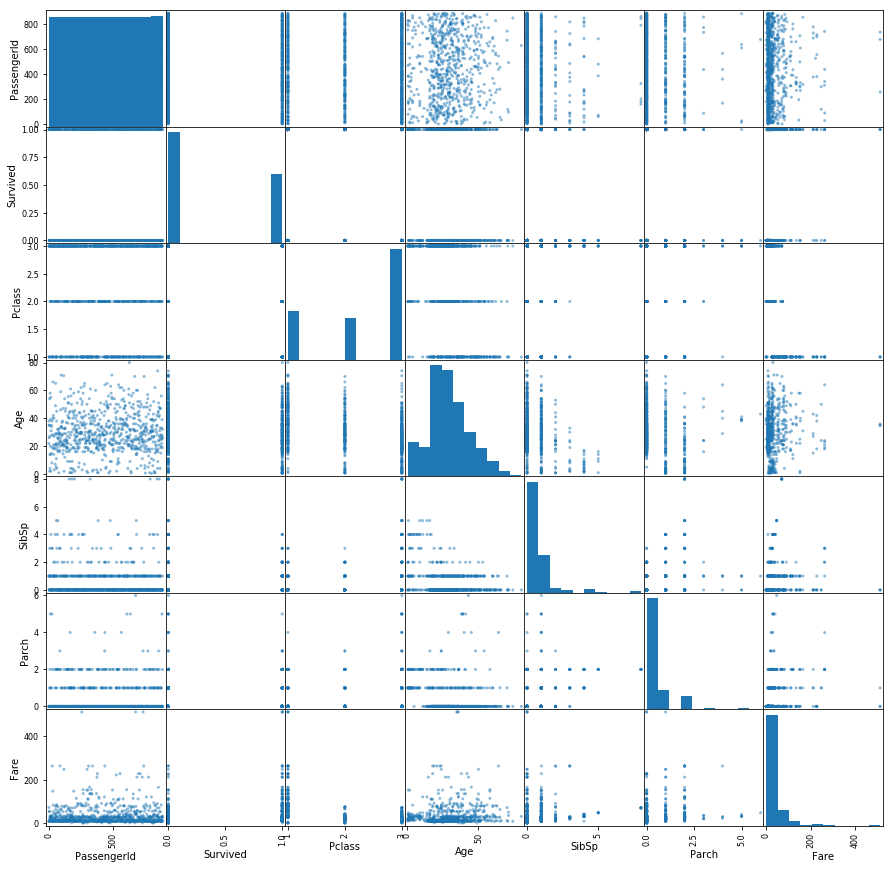

In [17]:
pd.plotting.scatter_matrix(df_titanic, figsize=(15,15));

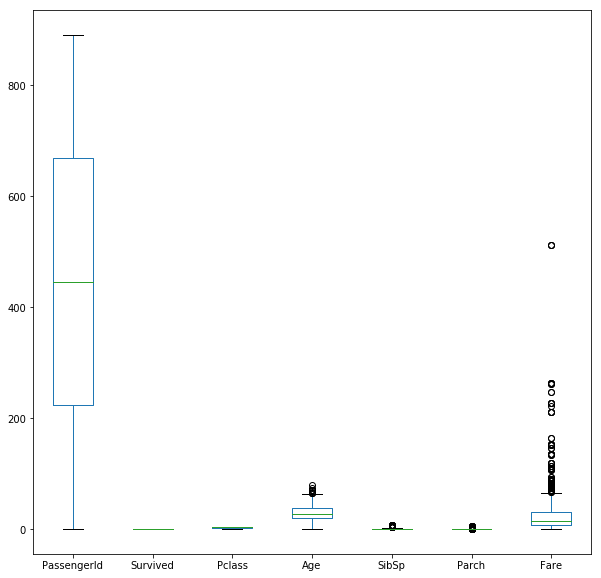

In [18]:
df_titanic.plot(kind='box', figsize=(10,10));

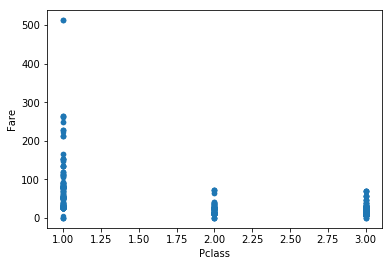

In [25]:
df_titanic.plot(x='Pclass', y='Fare', kind='scatter')

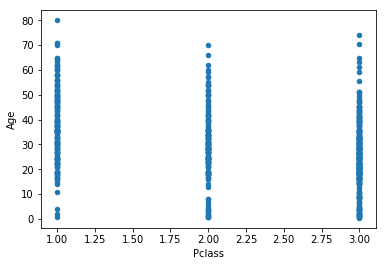

In [26]:
df_titanic.plot(x='Pclass', y='Age', kind='scatter')

# Quarto Passo
Tirando conclusões dos dados.



In [7]:
#Para plotar graficos no notebook jupyter
import matplotlib.pyplot as plt
%matplotlib inline

df_titanic = pd.read_csv("titanic-data-6.csv")

Respondendo pergunta 2

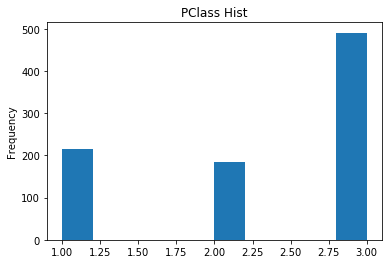

In [8]:
#Frequencia de cada classe comprada
df_titanic['pclass'].plot(kind='hist', title='PClass Hist');

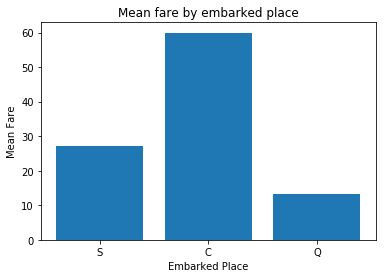

In [51]:
#Resolver gráfico
embarked = df_titanic['embarked'].unique()
embarked_list = []
for em in embarked:
    embarked_list.append(df_titanic.query("embarked == @em")['fare'].mean())

locations = [1, 2, 3]
heights = [embarked_list[0], embarked_list[1], embarked_list[2]]
labels = ['S', 'C', 'Q']
plt.bar(locations, heights, tick_label=labels)
plt.title('Média da taxa por local de embarque')
plt.xlabel('Local embarque')
plt.ylabel('Taxa Média');

In [132]:
embarked = df_titanic['embarked'].unique()

def status_classe(cl):
    for em in embarked:
        total = df_titanic.query("embarked == @em").shape[0]
        print('Embarked in: {0}, Classe: {1}, Embarcados: {2}, Proporção: {3}, Fare Médio: {4}'.format(
                em, cl, df_titanic.query("embarked == @em and pclass == @cl")['pclass'].count(), df_titanic.query("embarked == @em and pclass == @cl")['pclass'].count()/total, df_titanic.query("embarked == @em and pclass == @cl")['fare'].mean()))
    print("\n")

In [133]:
pclass = df_titanic['pclass'].unique()
for pcl in pclass:
    status_classe(pcl)

Embarked in: S, Classe: 3, Embarcados: 353, Proporção: 0.5481366459627329, Fare Médio: 14.644083002832863
Embarked in: C, Classe: 3, Embarcados: 66, Proporção: 0.39285714285714285, Fare Médio: 11.214083333333333
Embarked in: Q, Classe: 3, Embarcados: 72, Proporção: 0.935064935064935, Fare Médio: 11.183393055555557
Embarked in: nan, Classe: 3, Embarcados: 0, Proporção: nan, Fare Médio: nan


Embarked in: S, Classe: 1, Embarcados: 127, Proporção: 0.1972049689440994, Fare Médio: 70.36486220472442
Embarked in: C, Classe: 1, Embarcados: 85, Proporção: 0.5059523809523809, Fare Médio: 104.71852941176469
Embarked in: Q, Classe: 1, Embarcados: 2, Proporção: 0.025974025974025976, Fare Médio: 90.0
Embarked in: nan, Classe: 1, Embarcados: 0, Proporção: nan, Fare Médio: nan


Embarked in: S, Classe: 2, Embarcados: 164, Proporção: 0.2546583850931677, Fare Médio: 20.327439024390245
Embarked in: C, Classe: 2, Embarcados: 17, Proporção: 0.10119047619047619, Fare Médio: 25.358335294117648
Embarked in: Q

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


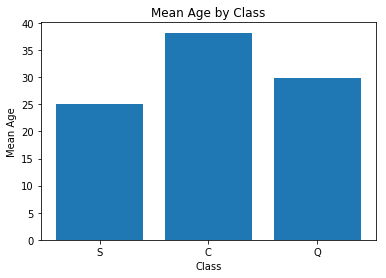

In [52]:
#df_titanic.plot(kind='scatter', x='pclass', y='age', title='PClass x Age');
pclass = df_titanic['pclass'].unique()
pclass_list = []
for pcl in pclass:
    pclass_list.append(df_titanic.query("pclass == @pcl")['age'].mean())

locations = [1, 2, 3]
heights = [pclass_list[0], pclass_list[1], pclass_list[2]]
labels = ['1 Classe', '2 Classe', '3 Classe']
plt.bar(locations, heights, tick_label=labels)
plt.title('Idade média pela classe')
plt.xlabel('Class')
plt.ylabel('Idade Média');

In [42]:
pclass = df_titanic['pclass'].unique()
for pcl in pclass:
    print('Classe: {0}, Idade Média: {1}'.format(
                pcl, df_titanic.query("pclass == @pcl")['age'].mean()))

Classe: 3, Idade Média: 25.14061971830986
Classe: 1, Idade Média: 38.233440860215055
Classe: 2, Idade Média: 29.87763005780347


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


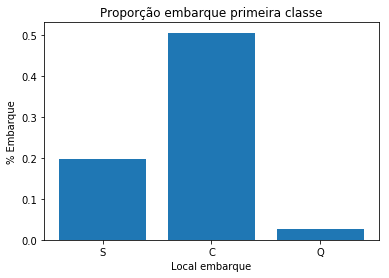

In [134]:
#Gráfico da proporção por local de embarque
embarked = df_titanic['embarked'].unique()
embarked_list = []
for em in embarked:
    embarked_list.append(df_titanic.query("embarked == @em and pclass ==1")['pclass'].count()/df_titanic.query("embarked == @em").shape[0])

locations = [1, 2, 3]
heights = [embarked_list[0], embarked_list[1], embarked_list[2]]
labels = ['S', 'C', 'Q']
plt.bar(locations, heights, tick_label=labels)
plt.title('Proporção embarque primeira classe')
plt.xlabel('Local embarque')
plt.ylabel('% Embarque');

Respondendo pergunta 1

In [94]:
survived = df_titanic.query('survived == 1')

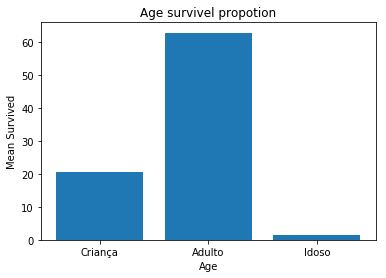

In [95]:
#Alterar para classificação das idade como jovem adulto e idoso
#df_titanic.groupby(["survived"]).mean()["age"].plot(kind="bar", ylim=(26,32), title="Idade Média Sobreviventes e Não sobreviventes")

locations = [1, 2, 3]
heights = [survived.query("age_levels == 'Crianca'")['age_levels'].count()/total_survived*100, survived.query("age_levels == 'Adulto'")['age_levels'].count()/total_survived*100, survived.query("age_levels == 'Idoso'")['age_levels'].count()/total_survived*100]
labels = ['Criança', 'Adulto', 'Idoso']
plt.bar(locations, heights, tick_label=labels)
plt.title('Age survivel propotion')
plt.xlabel('Age')
plt.ylabel('Mean Survived');

In [114]:
total_criancas = df_titanic.query("age_levels == 'Crianca'").shape[0]
total_adultos = df_titanic.query("age_levels == 'Adulto'").shape[0]
total_idosos = df_titanic.query("age_levels == 'Idoso'").shape[0]

print("Sobreviveram {}% das crianças a bordo".format(survived.query("age_levels == 'Crianca'")['age_levels'].count()/total_criancas*100))
print("Sobreviveram {}% dos adultos a bordo".format(survived.query("age_levels == 'Adulto'")['age_levels'].count()/total_adultos*100))
print("Sobreviveram {}% dos idosos a bordo".format(survived.query("age_levels == 'Idoso'")['age_levels'].count()/total_idosos*100))

Sobreviveram 50.35971223021583% das crianças
Sobreviveram 38.87884267631103% dos adultos
Sobreviveram 22.727272727272727% dos idosos


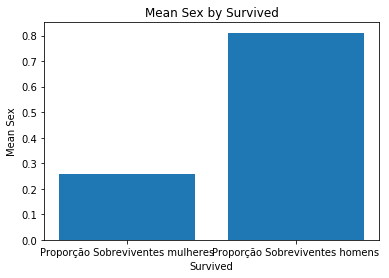

In [61]:
female = df_titanic.query("sex == 'female'")
male = df_titanic.query("sex == 'male'")
locations = [1, 2]
heights = [female.query("survived == 0")['survived'].count(), male.query("survived == 0")['survived'].count()]
labels = ['Mulheres Sobreviventes', 'Homens Sobreviventes']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Qtde. Sobreviventes');

In [73]:
total_female = female.shape[0]
total_male = male.shape[0]
print("Sobreviveram {}% das mulheres".format(female.query("survived == 0")['survived'].count()/total_female*100))
print("Sobreviveram {}% dos homens".format(male.query("survived == 0")['survived'].count()/total_male*100))

Sobreviveram 25.796178343949045% das mulheres
Sobreviveram 81.10918544194108% dos homens


In [87]:
total_survived = survived.shape[0]
print("Sobreviveram {}% da primeira classe".format(survived.query("pclass == 1")['pclass'].count()/total_survived*100))
print("Sobreviveram {}% da segunda classe".format(survived.query("pclass == 2")['pclass'].count()/total_survived*100))
print("Sobreviveram {}% da terceira classe".format(survived.query("pclass == 3")['pclass'].count()/total_survived*100))

Sobreviveram 39.76608187134503% da primeira classe
Sobreviveram 25.438596491228072% da segunda classe
Sobreviveram 34.7953216374269% da terceira classe


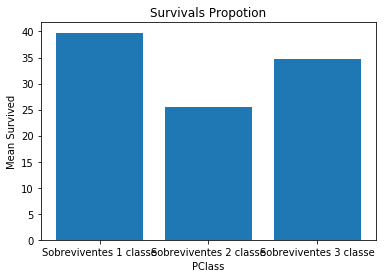

In [93]:
locations = [1, 2, 3]
heights = [survived.query("pclass == 1")['pclass'].count(), survived.query("pclass == 2")['pclass'].count(), survived.query("pclass == 3")['pclass'].count()]
labels = ['1 classe', '2 classe', '3 classe']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes pela Classe')
plt.xlabel('Classe')
plt.ylabel('Qtde. Sobreviventes');

Respondendo pergunta 3

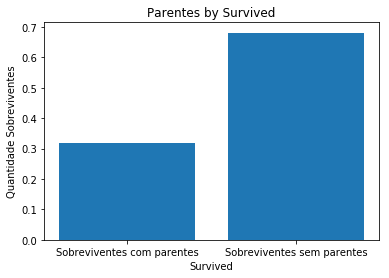

In [116]:
locations = [1, 2]
total_survived = survived.shape[0]
heights = [survived.query("parch > 0")['parch'].count()/total_survived, survived.query("parch == 0")['parch'].count()/total_survived]
labels = ['Sobreviventes com parentes', 'Sobreviventes sem parentes']
plt.bar(locations, heights, tick_label=labels)
plt.title('Parentes by Survived')
plt.xlabel('Survived')
plt.ylabel('Quantidade Sobreviventes');

In [119]:
total_survived = survived.shape[0]
print("Sobreviveram {}% da pessoas com pais ou filhos".format(survived.query("parch > 0")['parch'].count()/total_survived*100))
print("Sobreviveram {}% da pessoas sem relativos pais ou filhos".format(survived.query("parch == 0")['parch'].count()/total_survived*100))

Sobreviveram 31.871345029239766% da pessoas com pais ou filhos
Sobreviveram 68.12865497076024% da pessoas sem relativos pais ou filhos


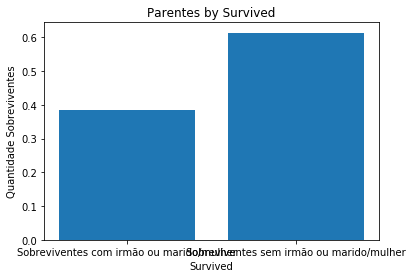

In [120]:
locations = [1, 2]
total_survived = survived.shape[0]
heights = [survived.query("sibsp > 0")['parch'].count()/total_survived, survived.query("sibsp == 0")['parch'].count()/total_survived]
labels = ['Sobreviventes com irmão ou marido/mulher', 'Sobreviventes sem irmão ou marido/mulher']
plt.bar(locations, heights, tick_label=labels)
plt.title('Parentes by Survived')
plt.xlabel('Survived')
plt.ylabel('Quantidade Sobreviventes');

In [122]:
total_survived = survived.shape[0]
print("Sobreviveram {}% da pessoas com irmãos ou marido/mulher".format(survived.query("sibsp > 0")['parch'].count()/total_survived*100))
print("Sobreviveram {}% da pessoas sem irmãos ou marido/mulher".format(survived.query("sibsp == 0")['parch'].count()/total_survived*100))

Sobreviveram 38.59649122807017% da pessoas com irmãos ou marido/mulher
Sobreviveram 61.40350877192983% da pessoas sem irmãos ou marido/mulher


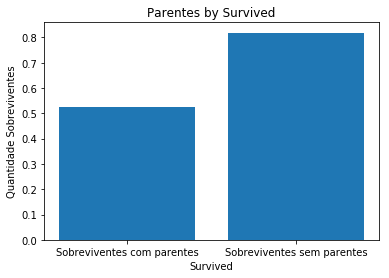

In [123]:
locations = [1, 2]
total_survived = survived.shape[0]
heights = [survived.query("parch > 0 or sibsp > 0")['parch'].count()/total_survived, survived.query("parch == 0 or sibsp == 0")['parch'].count()/total_survived]
labels = ['Sobreviventes com parentes', 'Sobreviventes sem parentes']
plt.bar(locations, heights, tick_label=labels)
plt.title('Parentes by Survived')
plt.xlabel('Survived')
plt.ylabel('Quantidade Sobreviventes');

In [125]:
total_survived = survived.shape[0]
print("Sobreviveram {}% da pessoas com familiares".format(survived.query("sibsp > 0 or sibsp > 0")['parch'].count()/total_survived*100))
print("Sobreviveram {}% da pessoas sem familiares".format(survived.query("sibsp == 0 or sibsp == 0")['parch'].count()/total_survived*100))

Sobreviveram 38.59649122807017% da pessoas com familiares
Sobreviveram 61.40350877192983% da pessoas sem familiares
